# Primates Hormone Immune Induction Analysis

In [1]:
data_path = '/Users/nises/Desktop/RA/2021-09-09_induction_hormone_immune.tsv'

In [2]:
columns = ['ID','DrinkingCategory','Species','Sex','Age',
           'Cortisol', 'ACTH', 'Testosterone', 'Deoxycorticosterone', 'Aldosterone', 'DHEAS', 'Osteocalcin', 'CTX',
           'FGF_basic', 'IL_1b', 'G_CSF', 'IL_10', 'IL_6', 'IL_12', 'RANTES', 'Eotaxin', 'IL_17', 'MIP_1a', 
           'GM_CSF', 'MIP_1b', 'MCP_1', 'IL_15', 'EGF', 'IL_5', 'HGF', 'VEGF', 'IFN_y', 'MDC', 'I_TAC', 
           'MIFAnalyte_46', 'IL_1RA', 'TNF_a', 'IL_2', 'IP_10', 'MIG','IL_4', 'IL_8', 'IL_23', 'VEGF_D']

cols_i = ['FGF_basic', 'IL_1b', 'G_CSF', 'IL_10', 'IL_6', 'IL_12', 'RANTES', 'Eotaxin', 'IL_17', 'MIP_1a', 
        'GM_CSF', 'MIP_1b', 'MCP_1', 'IL_15', 'EGF', 'IL_5', 'HGF', 'VEGF', 'IFN_y', 'MDC', 'I_TAC', 
        'MIFAnalyte_46', 'IL_1RA', 'TNF_a', 'IL_2', 'IP_10', 'MIG','IL_4', 'IL_8', 'IL_23', 'VEGF_D']

cols = ['Cortisol', 'ACTH', 'Testosterone', 'Deoxycorticosterone', 'Aldosterone', 'DHEAS', 'Osteocalcin', 'CTX',
       'FGF_basic', 'IL_1b', 'G_CSF', 'IL_10', 'IL_6', 'IL_12', 'RANTES', 'Eotaxin', 'IL_17', 'MIP_1a', 
        'MIP_1b', 'MCP_1', 'IL_15', 'EGF', 'IL_5', 'HGF', 'VEGF', 'IFN_y', 'MDC', 'I_TAC', 
        'MIFAnalyte_46', 'IL_1RA', 'TNF_a', 'IL_2', 'IP_10', 'MIG','IL_4', 'IL_8']

# Data distributions

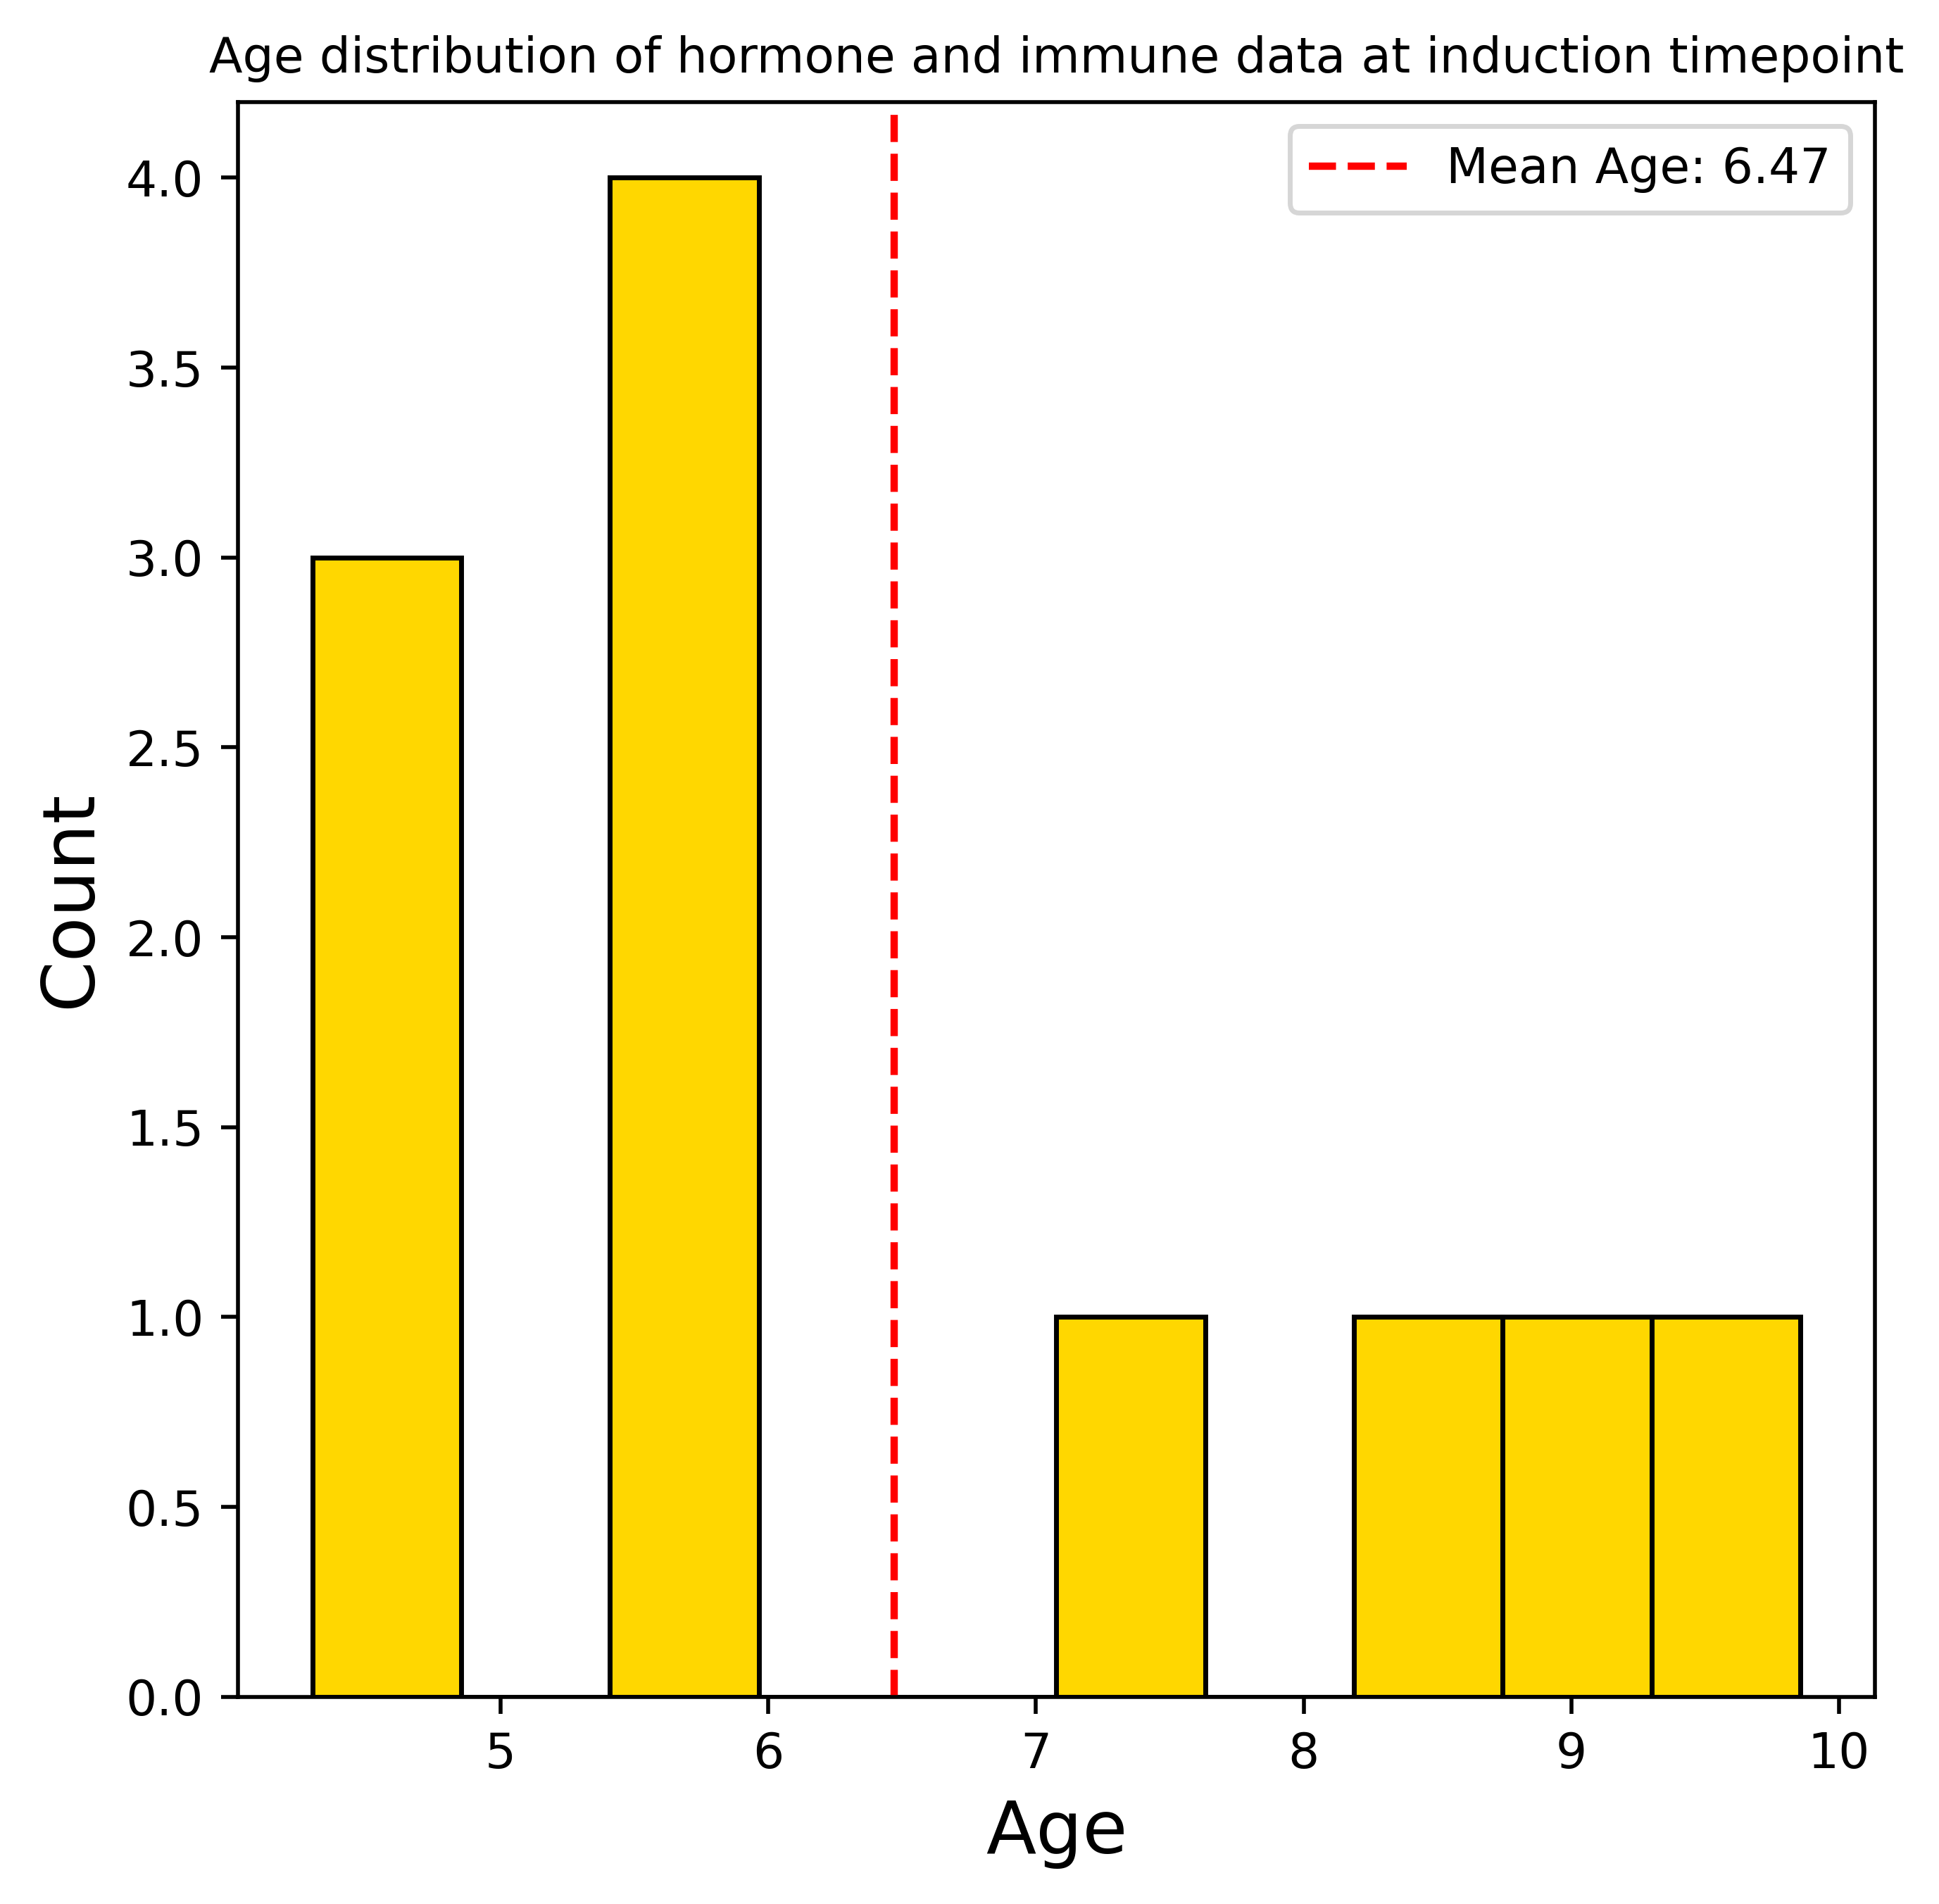

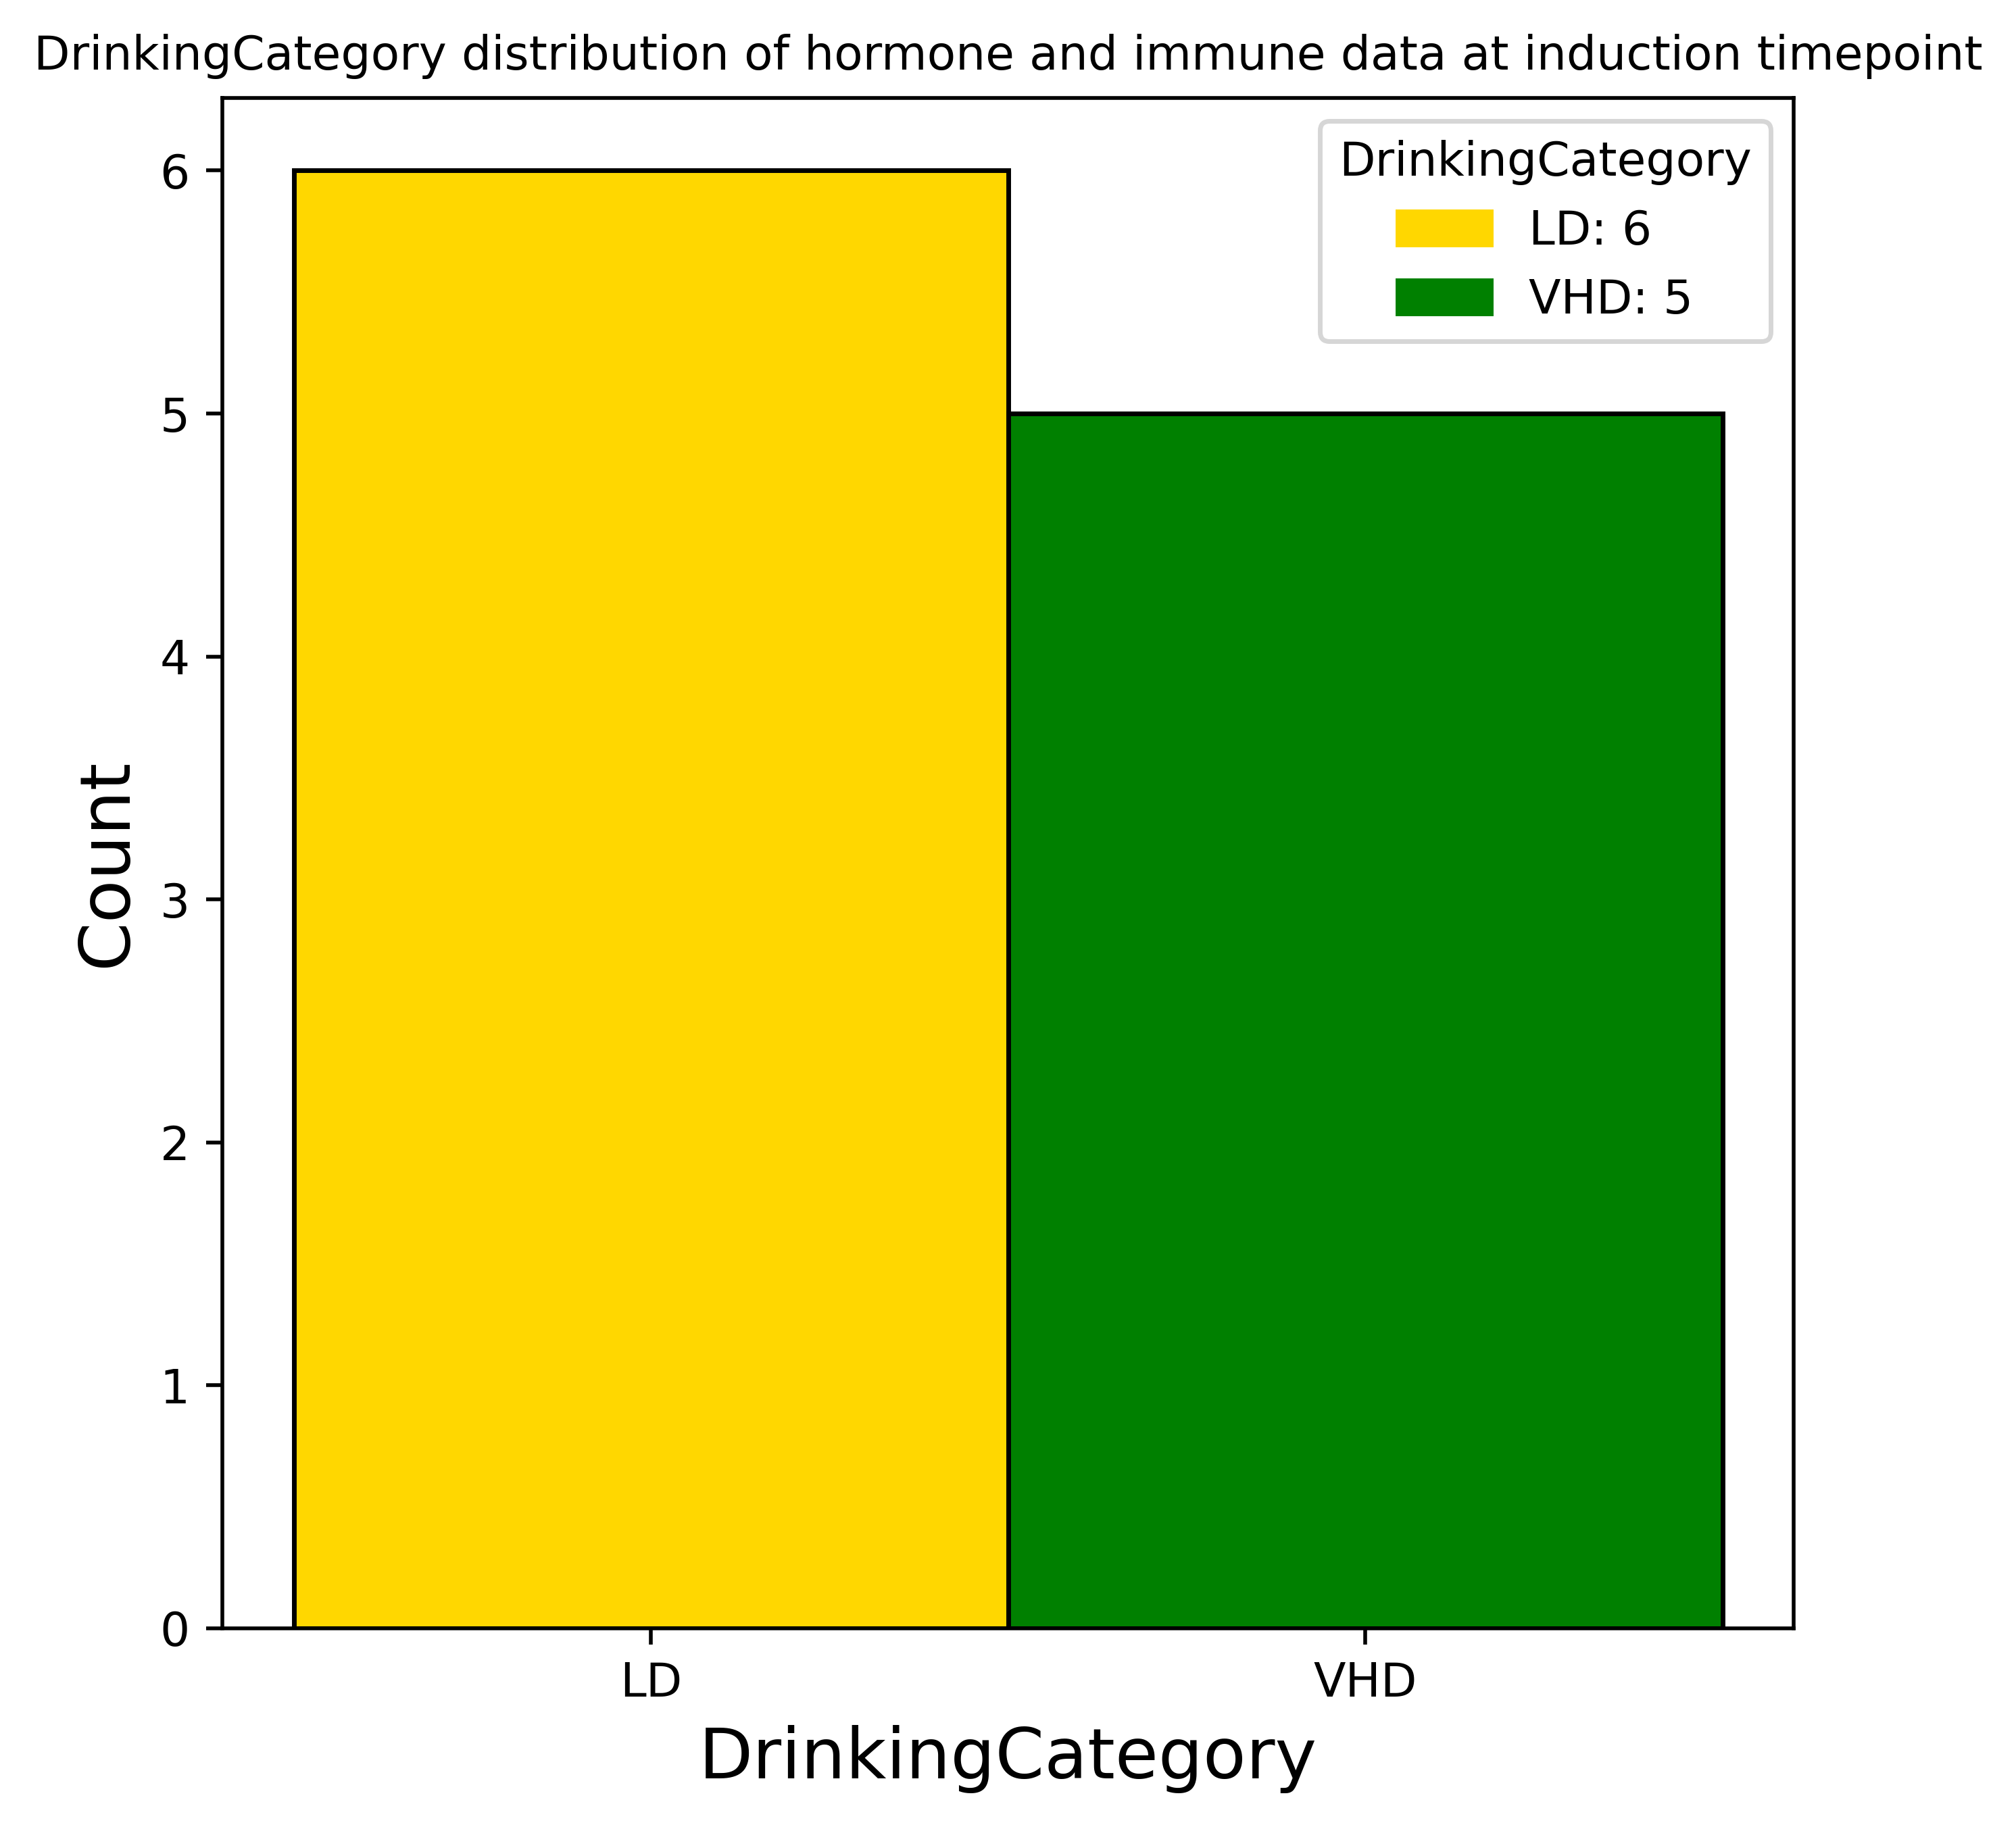

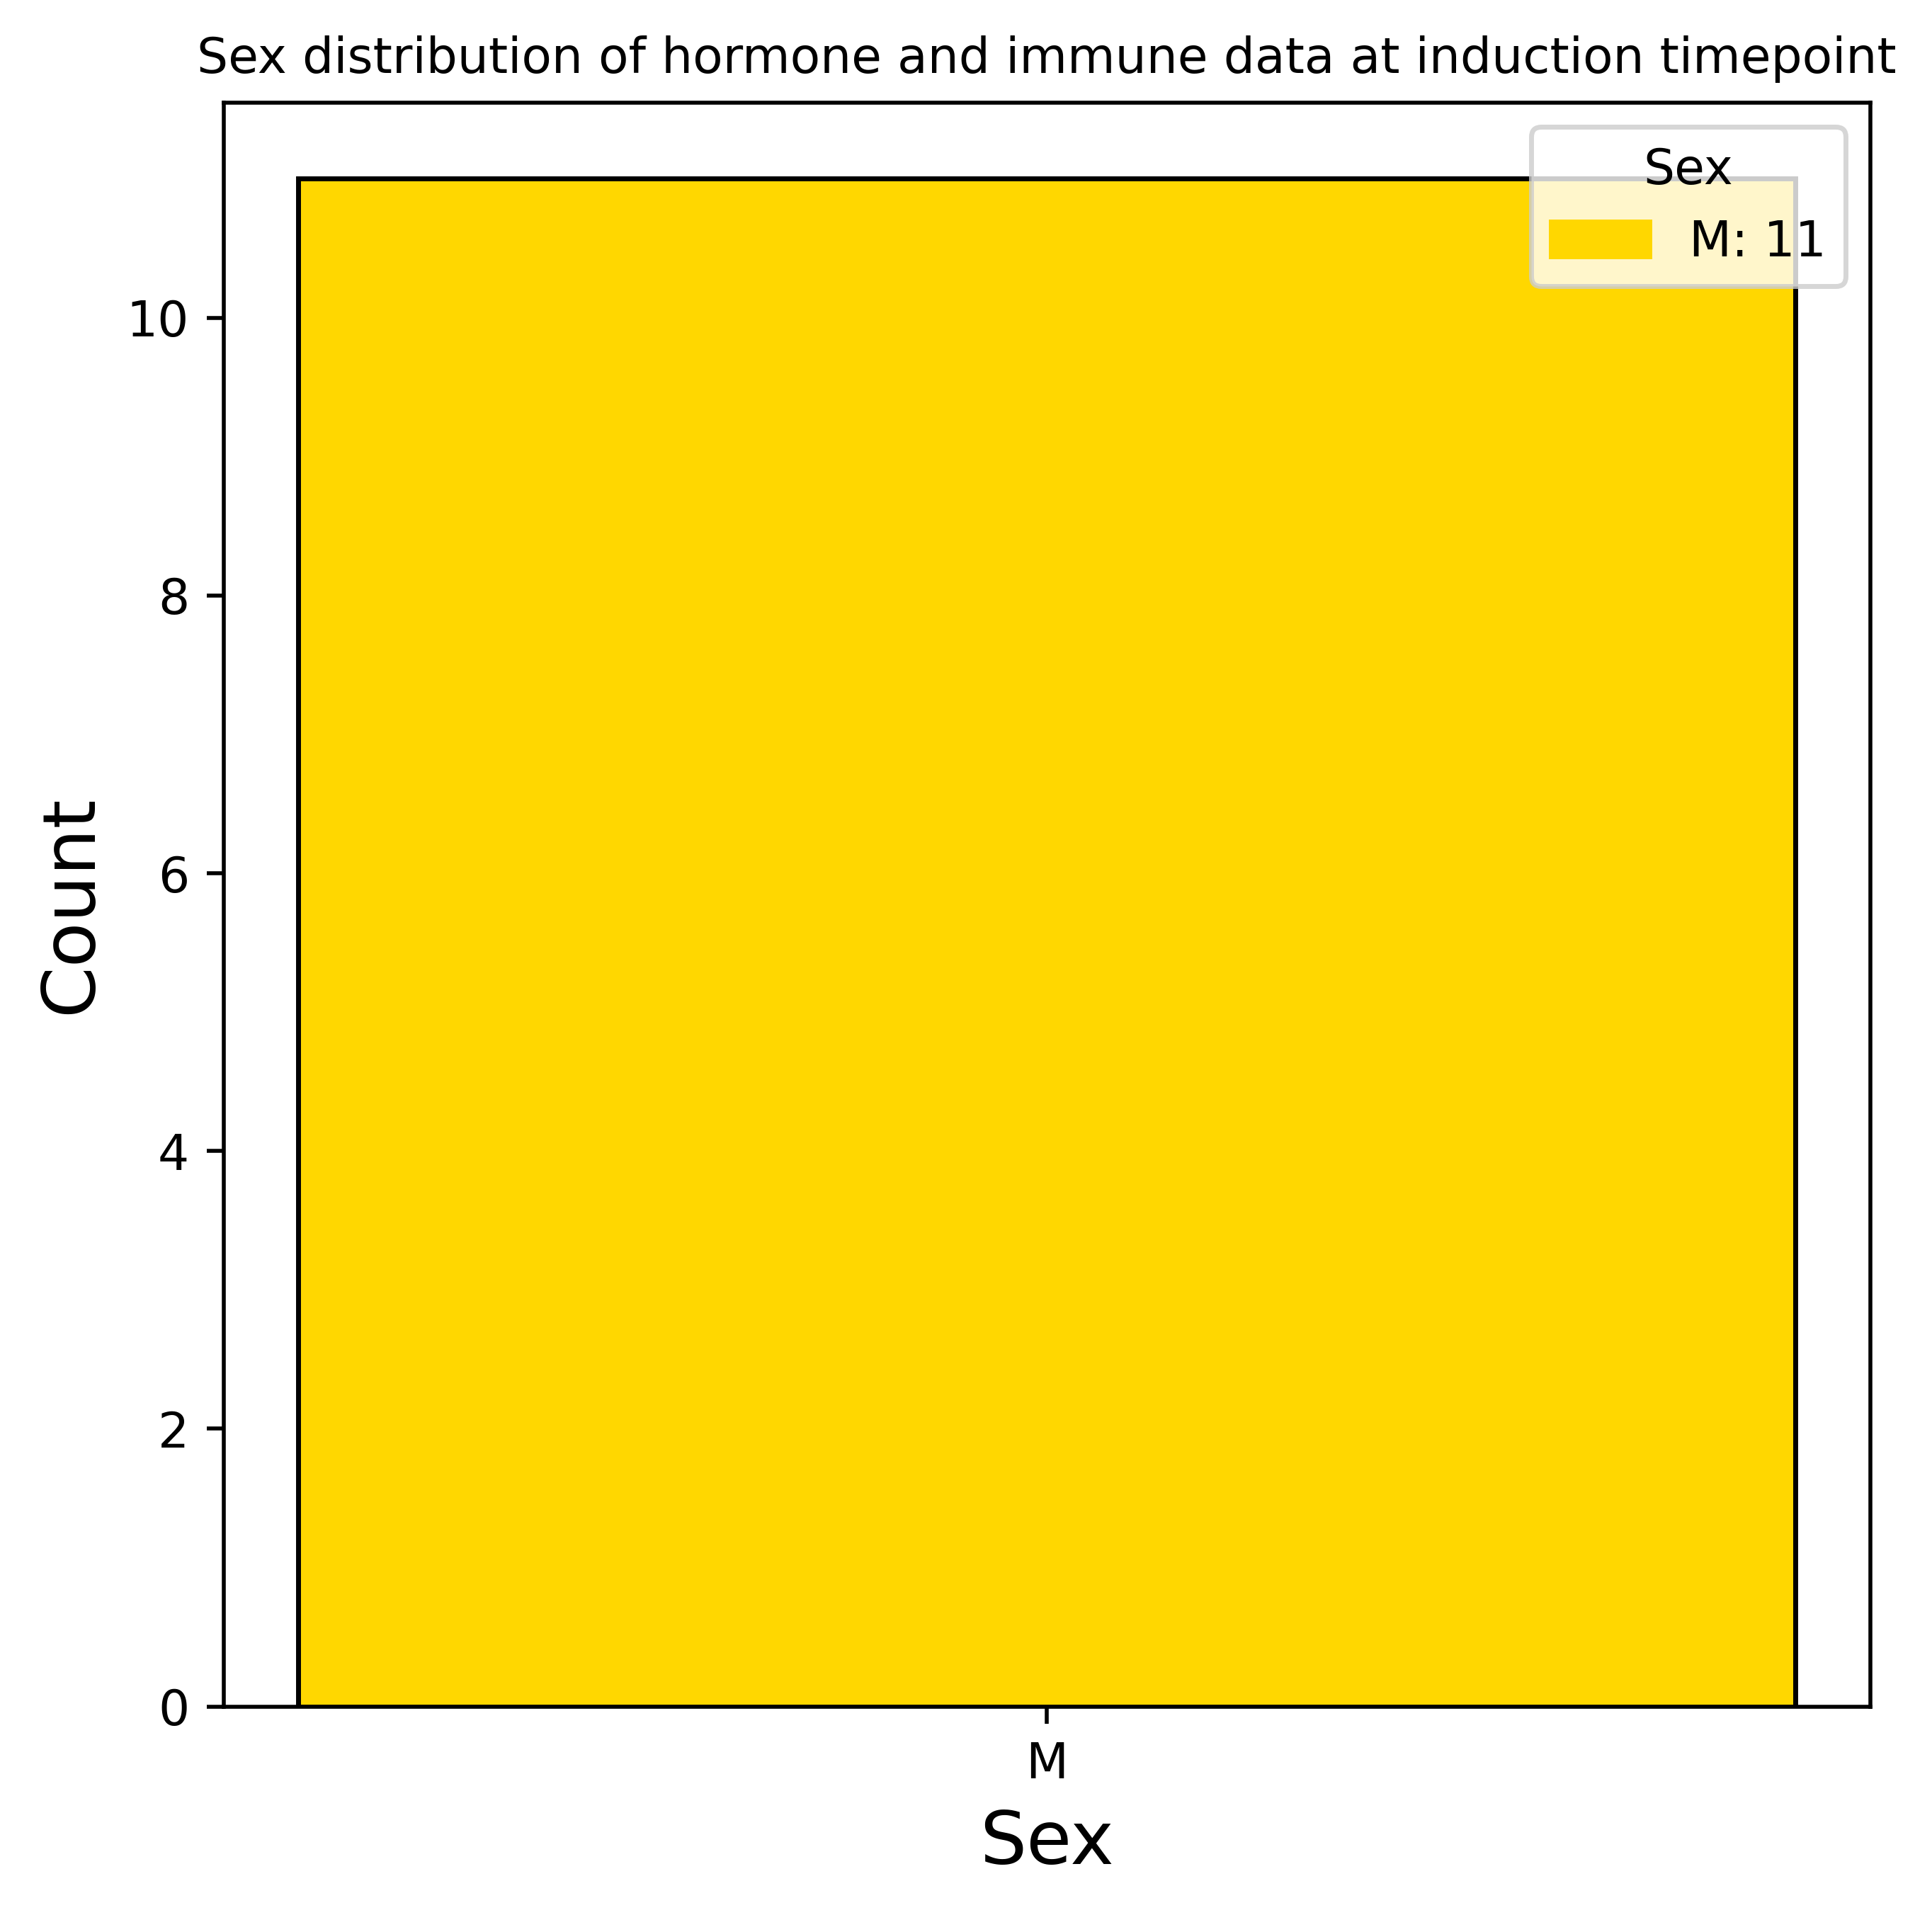

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataframe
Hormone_columns = ['ID','DrinkingCategory','Species','Sex','Age', 
                  'Cortisol', 'ACTH', 'Testosterone', 'Deoxycorticosterone', 'Aldosterone', 'DHEAS', 'Osteocalcin', 'CTX',
                  'FGF_basic', 'IL_1b', 'G_CSF', 'IL_10', 'IL_6', 'IL_12', 'RANTES', 'Eotaxin', 'IL_17', 'MIP_1a', 
                    'MIP_1b', 'MCP_1', 'IL_15', 'EGF', 'IL_5', 'HGF', 'VEGF', 'IFN_y', 'MDC', 'I_TAC', 
                    'MIFAnalyte_46', 'IL_1RA', 'TNF_a', 'IL_2', 'IP_10', 'MIG','IL_4', 'IL_8']
df = pd.read_table(data_path)
df = df.filter(Hormone_columns).dropna().query("DrinkingCategory in ['LD', 'VHD']")
df = df.reset_index(drop=True)

plt.figure(figsize=(6, 6), dpi=500)
plt.hist(df['Age'], bins=10, edgecolor='black', color='gold')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Age distribution of hormone and immune data at induction timepoint',fontsize=10)
mean_age = df['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=1.5, label=f'Mean Age: {mean_age:.2f}')
plt.legend(fontsize=10)
plt.savefig("/Users/nises/Desktop/figures/demo/induction_hi_age.pdf")
plt.show()

plt.figure(figsize=(6, 6), dpi=500)
colors = ['gold', 'green']
ax = sns.histplot(data=df, x='DrinkingCategory', bins=2, edgecolor='black')
plt.xlabel('DrinkingCategory', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('DrinkingCategory distribution of hormone and immune data at induction timepoint',fontsize=10)
dc_counts = df['DrinkingCategory'].value_counts()
for bar, color, count in zip(ax.containers[0], colors, dc_counts):
    bar.set_facecolor(color)
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, count, ha='center', va='bottom', color='white')
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=f'{dc}: {count}') for dc, color, count in zip(dc_counts.index, colors, dc_counts)]
plt.legend(handles=legend_handles, title='DrinkingCategory', loc='upper right')
plt.savefig("/Users/nises/Desktop/figures/demo/induction_hi_dc.pdf")
plt.show()

plt.figure(figsize=(6, 6), dpi=500)
colors = ['gold', 'green']
ax = sns.histplot(data=df, x='Sex', bins=2, edgecolor='black')
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Sex distribution of hormone and immune data at induction timepoint',fontsize=10)
sex_counts = df['Sex'].value_counts()
for bar, color, count in zip(ax.containers[0], colors, sex_counts):
    bar.set_facecolor(color)
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, count, ha='center', va='bottom', color='white')
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=f'{sex}: {count}') for sex, color, count in zip(sex_counts.index, colors, sex_counts)]
plt.legend(handles=legend_handles, title='Sex', loc='upper right')
plt.savefig("/Users/nises/Desktop/figures/demo/induction_hi_sex.pdf")
plt.show()

# Correlation Analysis

(11, 44)
6.470420959454547
Rhesus: 11
M: 11
LD: 6
VHD: 5
Highly correlated pairs of features: [('IL_1b', 'IL_15'), ('IL_1b', 'VEGF'), ('IL_1b', 'MIG'), ('MIP_1a', 'IFN_y'), ('MIP_1b', 'VEGF'), ('IL_15', 'IL_1b'), ('IL_15', 'VEGF'), ('VEGF', 'IL_1b'), ('VEGF', 'MIP_1b'), ('VEGF', 'IL_15'), ('VEGF', 'MIG'), ('IFN_y', 'MIP_1a'), ('MIG', 'IL_1b'), ('MIG', 'VEGF')]


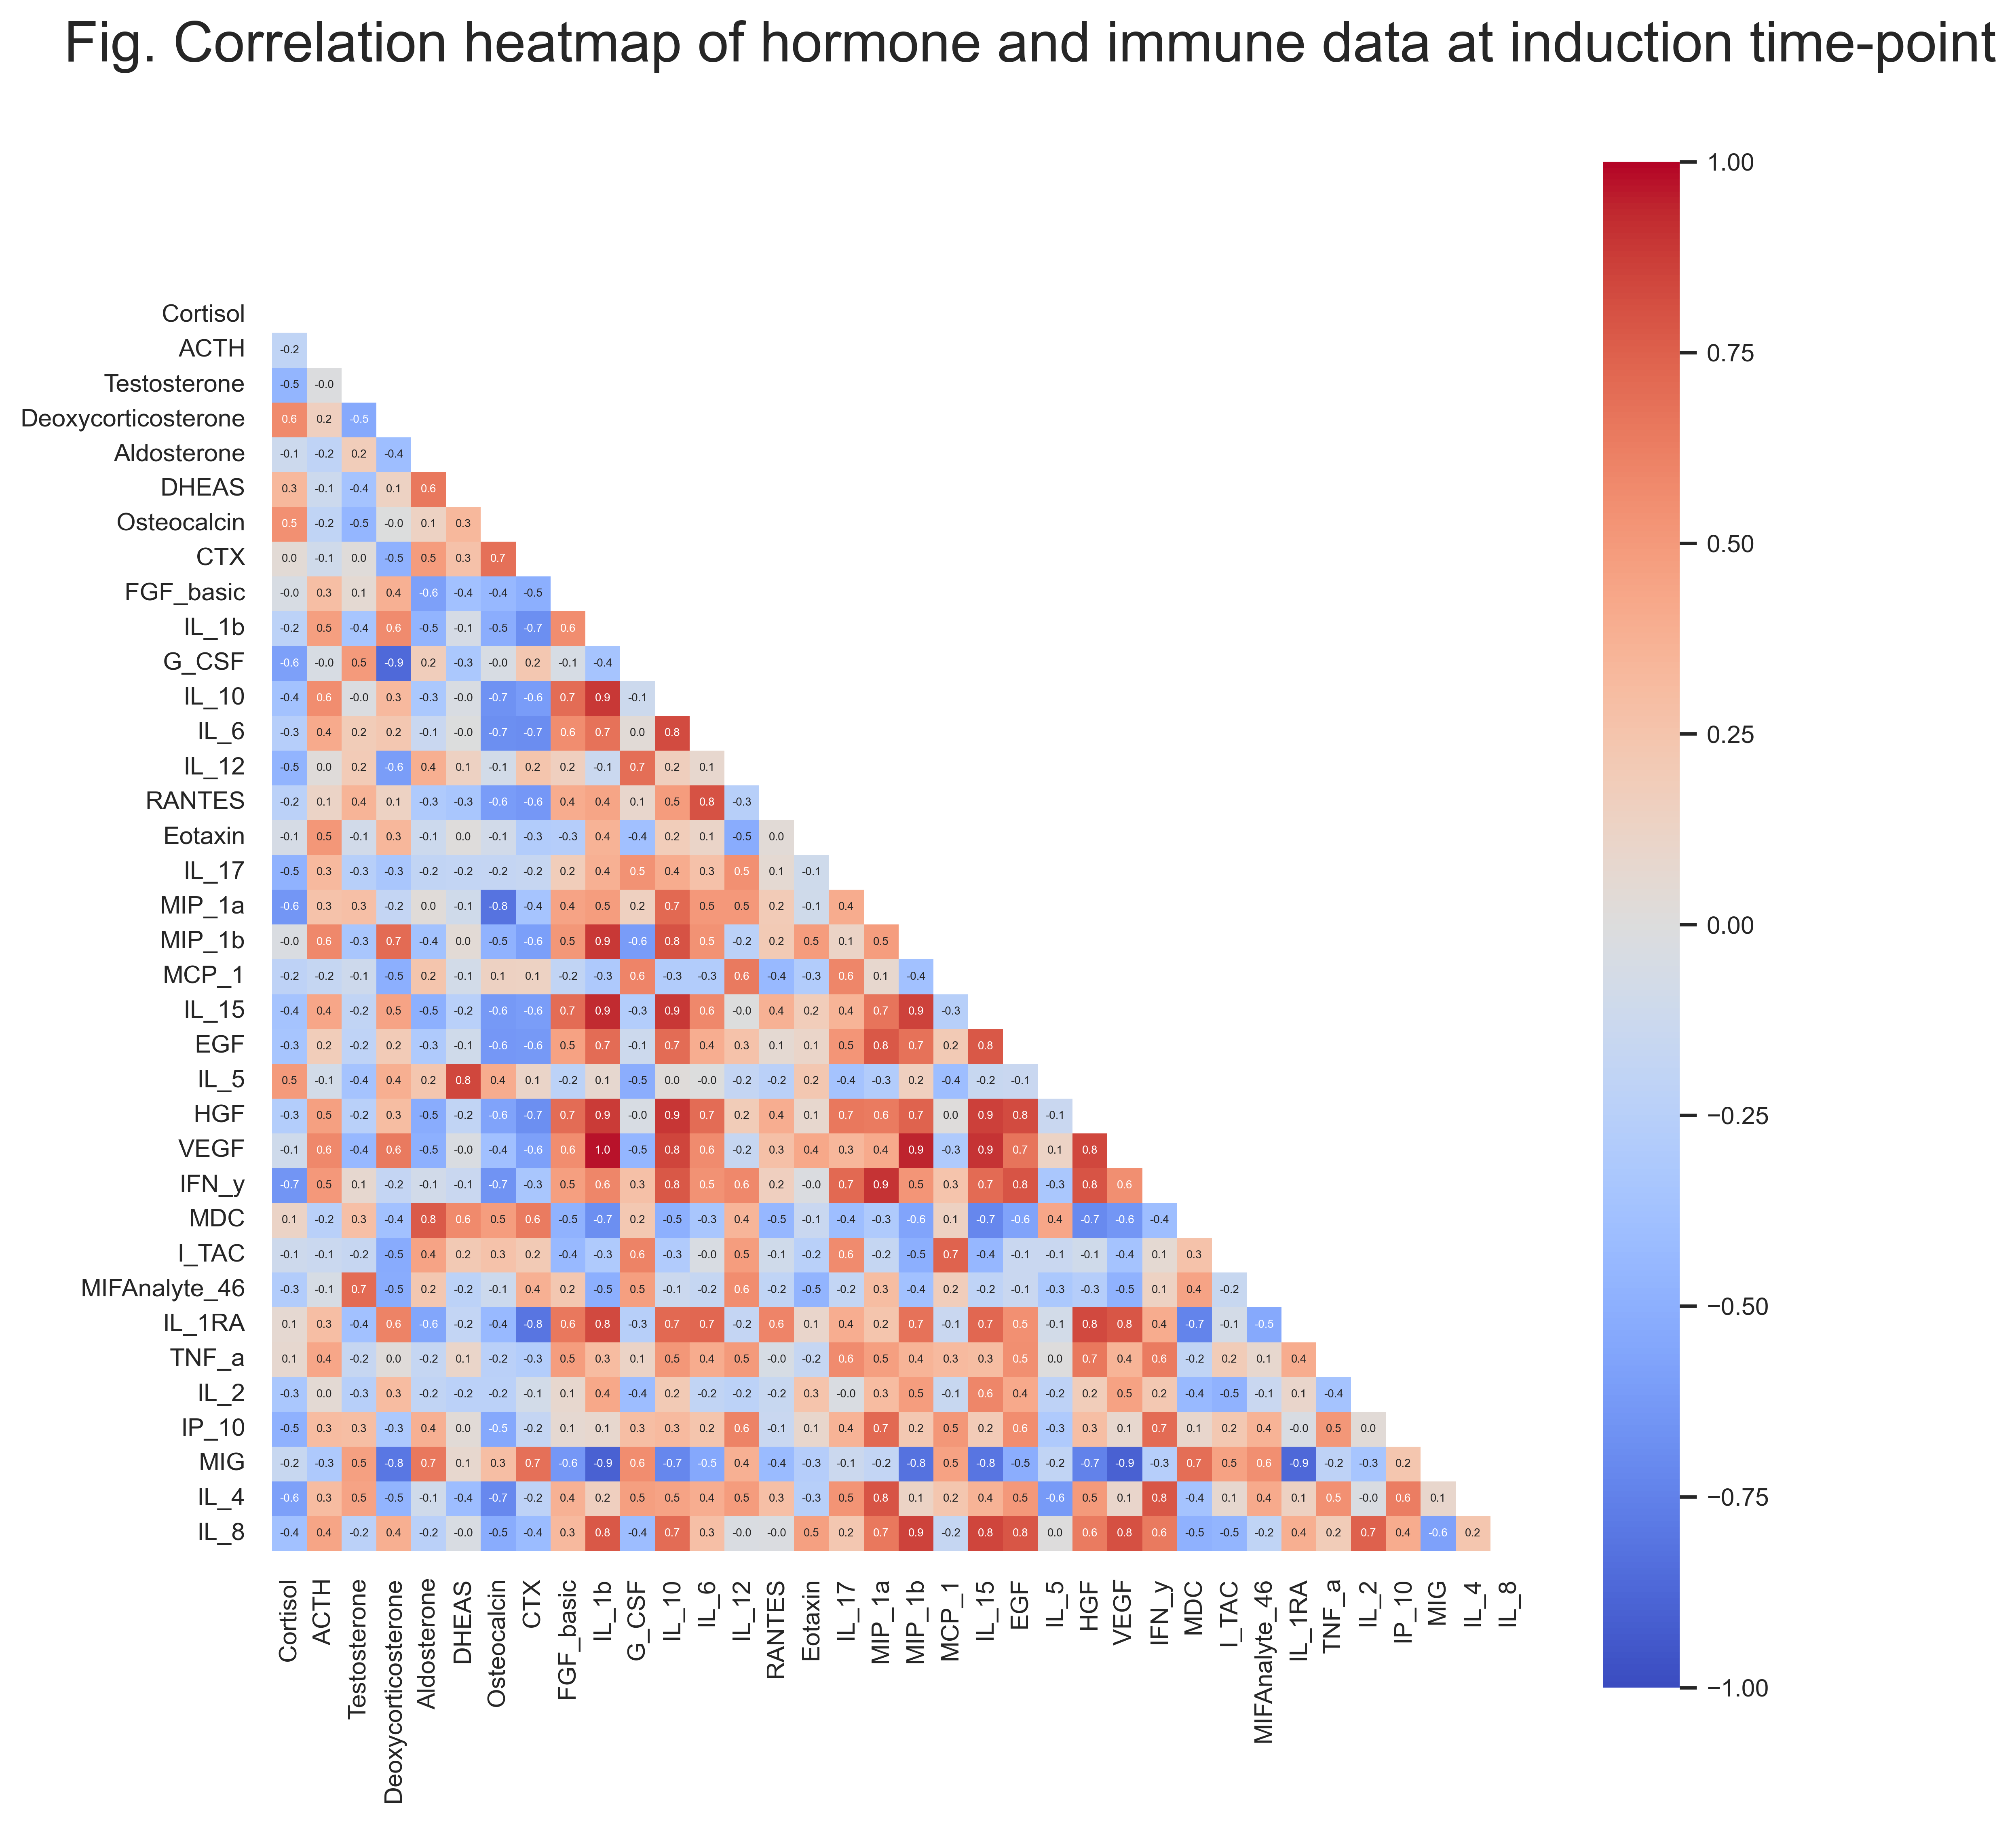

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_table(data_path)
df = df.filter(columns).dropna().query("DrinkingCategory in ['LD', 'VHD']")
df = df.reset_index(drop=True)
print(df.shape)

print(df['Age'].mean())
species_counts = df['Species'].value_counts()
for index, count in species_counts.iteritems():
    print(f"{index}: {count}") 
sex_counts = df['Sex'].value_counts()
for index, count in sex_counts.iteritems():
    print(f"{index}: {count}")
dc_counts = df['DrinkingCategory'].value_counts()
for index, count in dc_counts.iteritems():
    print(f"{index}: {count}")

# Calculate the correlation matrix
corr_matrix = df[cols].corr()


# Identify highly correlated pairs of features
high_corr = corr_matrix[(abs(corr_matrix) >= 0.9) & (corr_matrix < 1.0)]
high_corr_pairs = [(high_corr.index[x], high_corr.columns[y]) for x, y in zip(*np.where(high_corr.notnull()))]
print("Highly correlated pairs of features:", high_corr_pairs)

# Create a triangular heatmap with no redundant information
plt.figure(figsize=(10, 10), dpi=500)
sns.set(font_scale=0.8)
sns.set_style("white")
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, fmt=".1f", square=True, annot=True, annot_kws={"fontsize":4})

# # Show the plot
plt.suptitle('Fig. Correlation heatmap of hormone and immune data at induction time-point', fontsize=20, y=0.95)
plt.savefig("/Users/nises/Desktop/figures/induction_hi_correlation.pdf")
plt.show()


# K-Means clustering primates hormone and immune induction

(11, 44)
[1 1 1 1 0 0 0 0 1 1 1]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


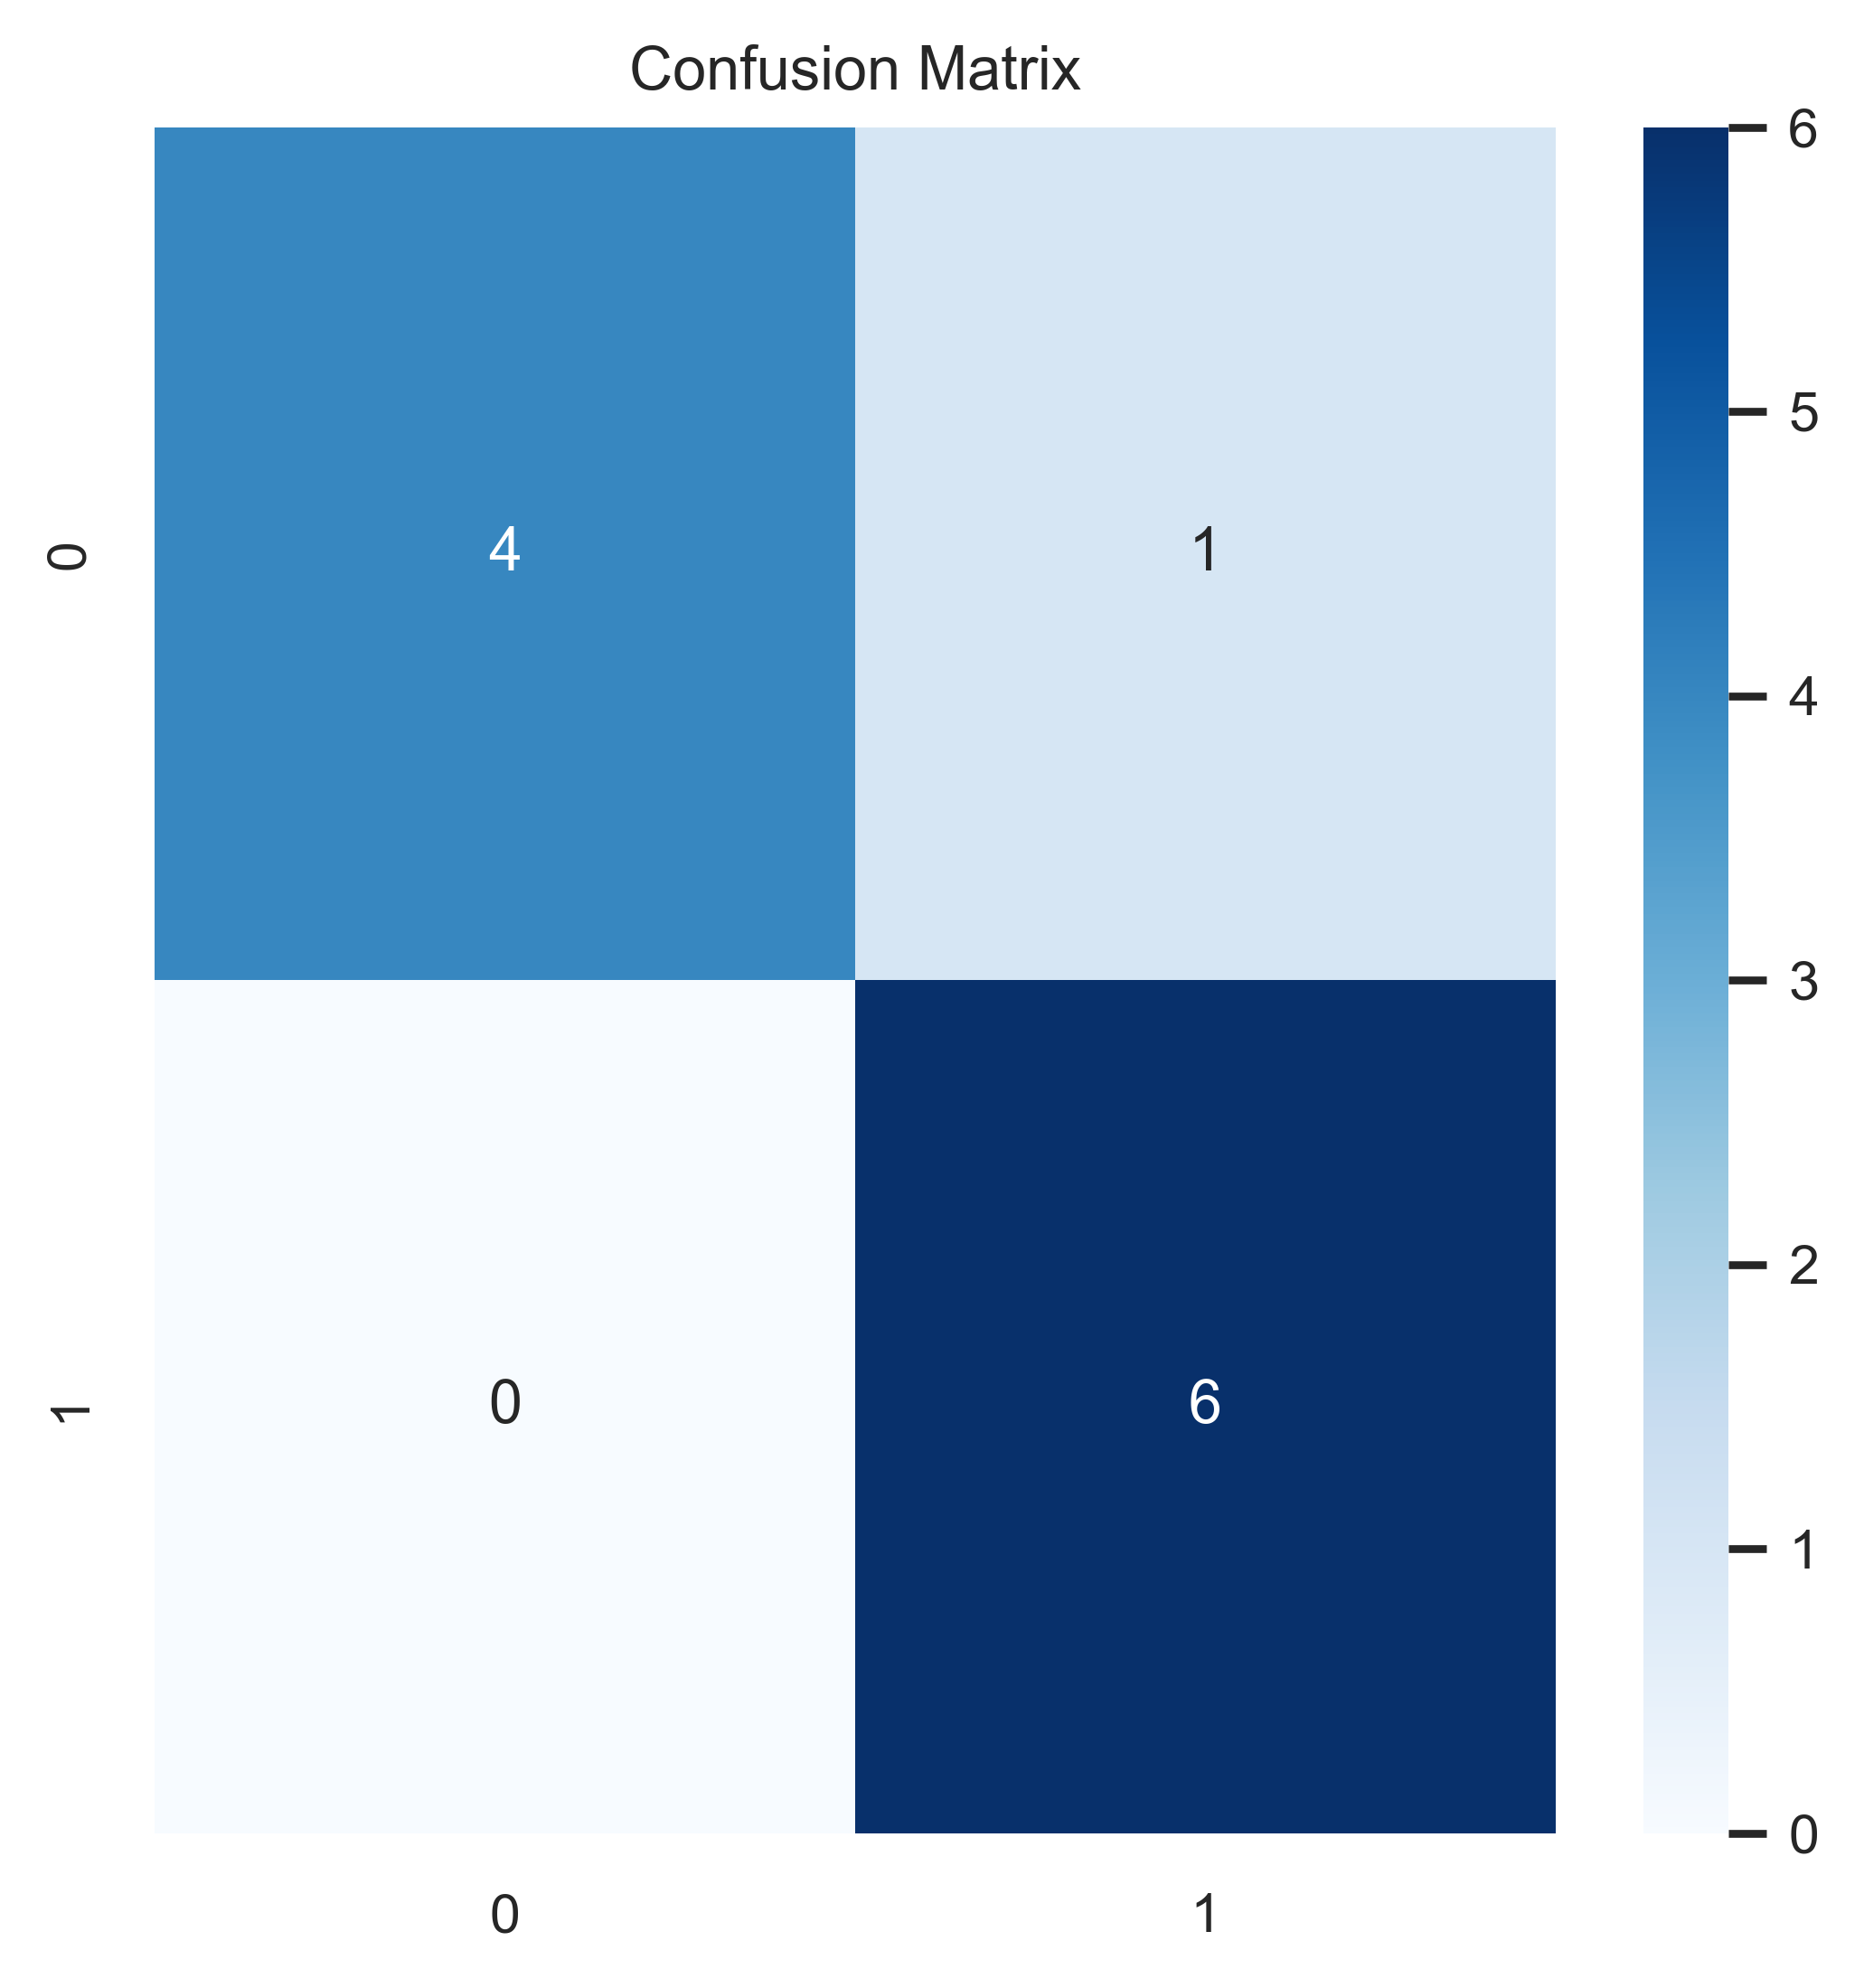

Accuracy of kmeans: 0.91


<Figure size 432x288 with 0 Axes>

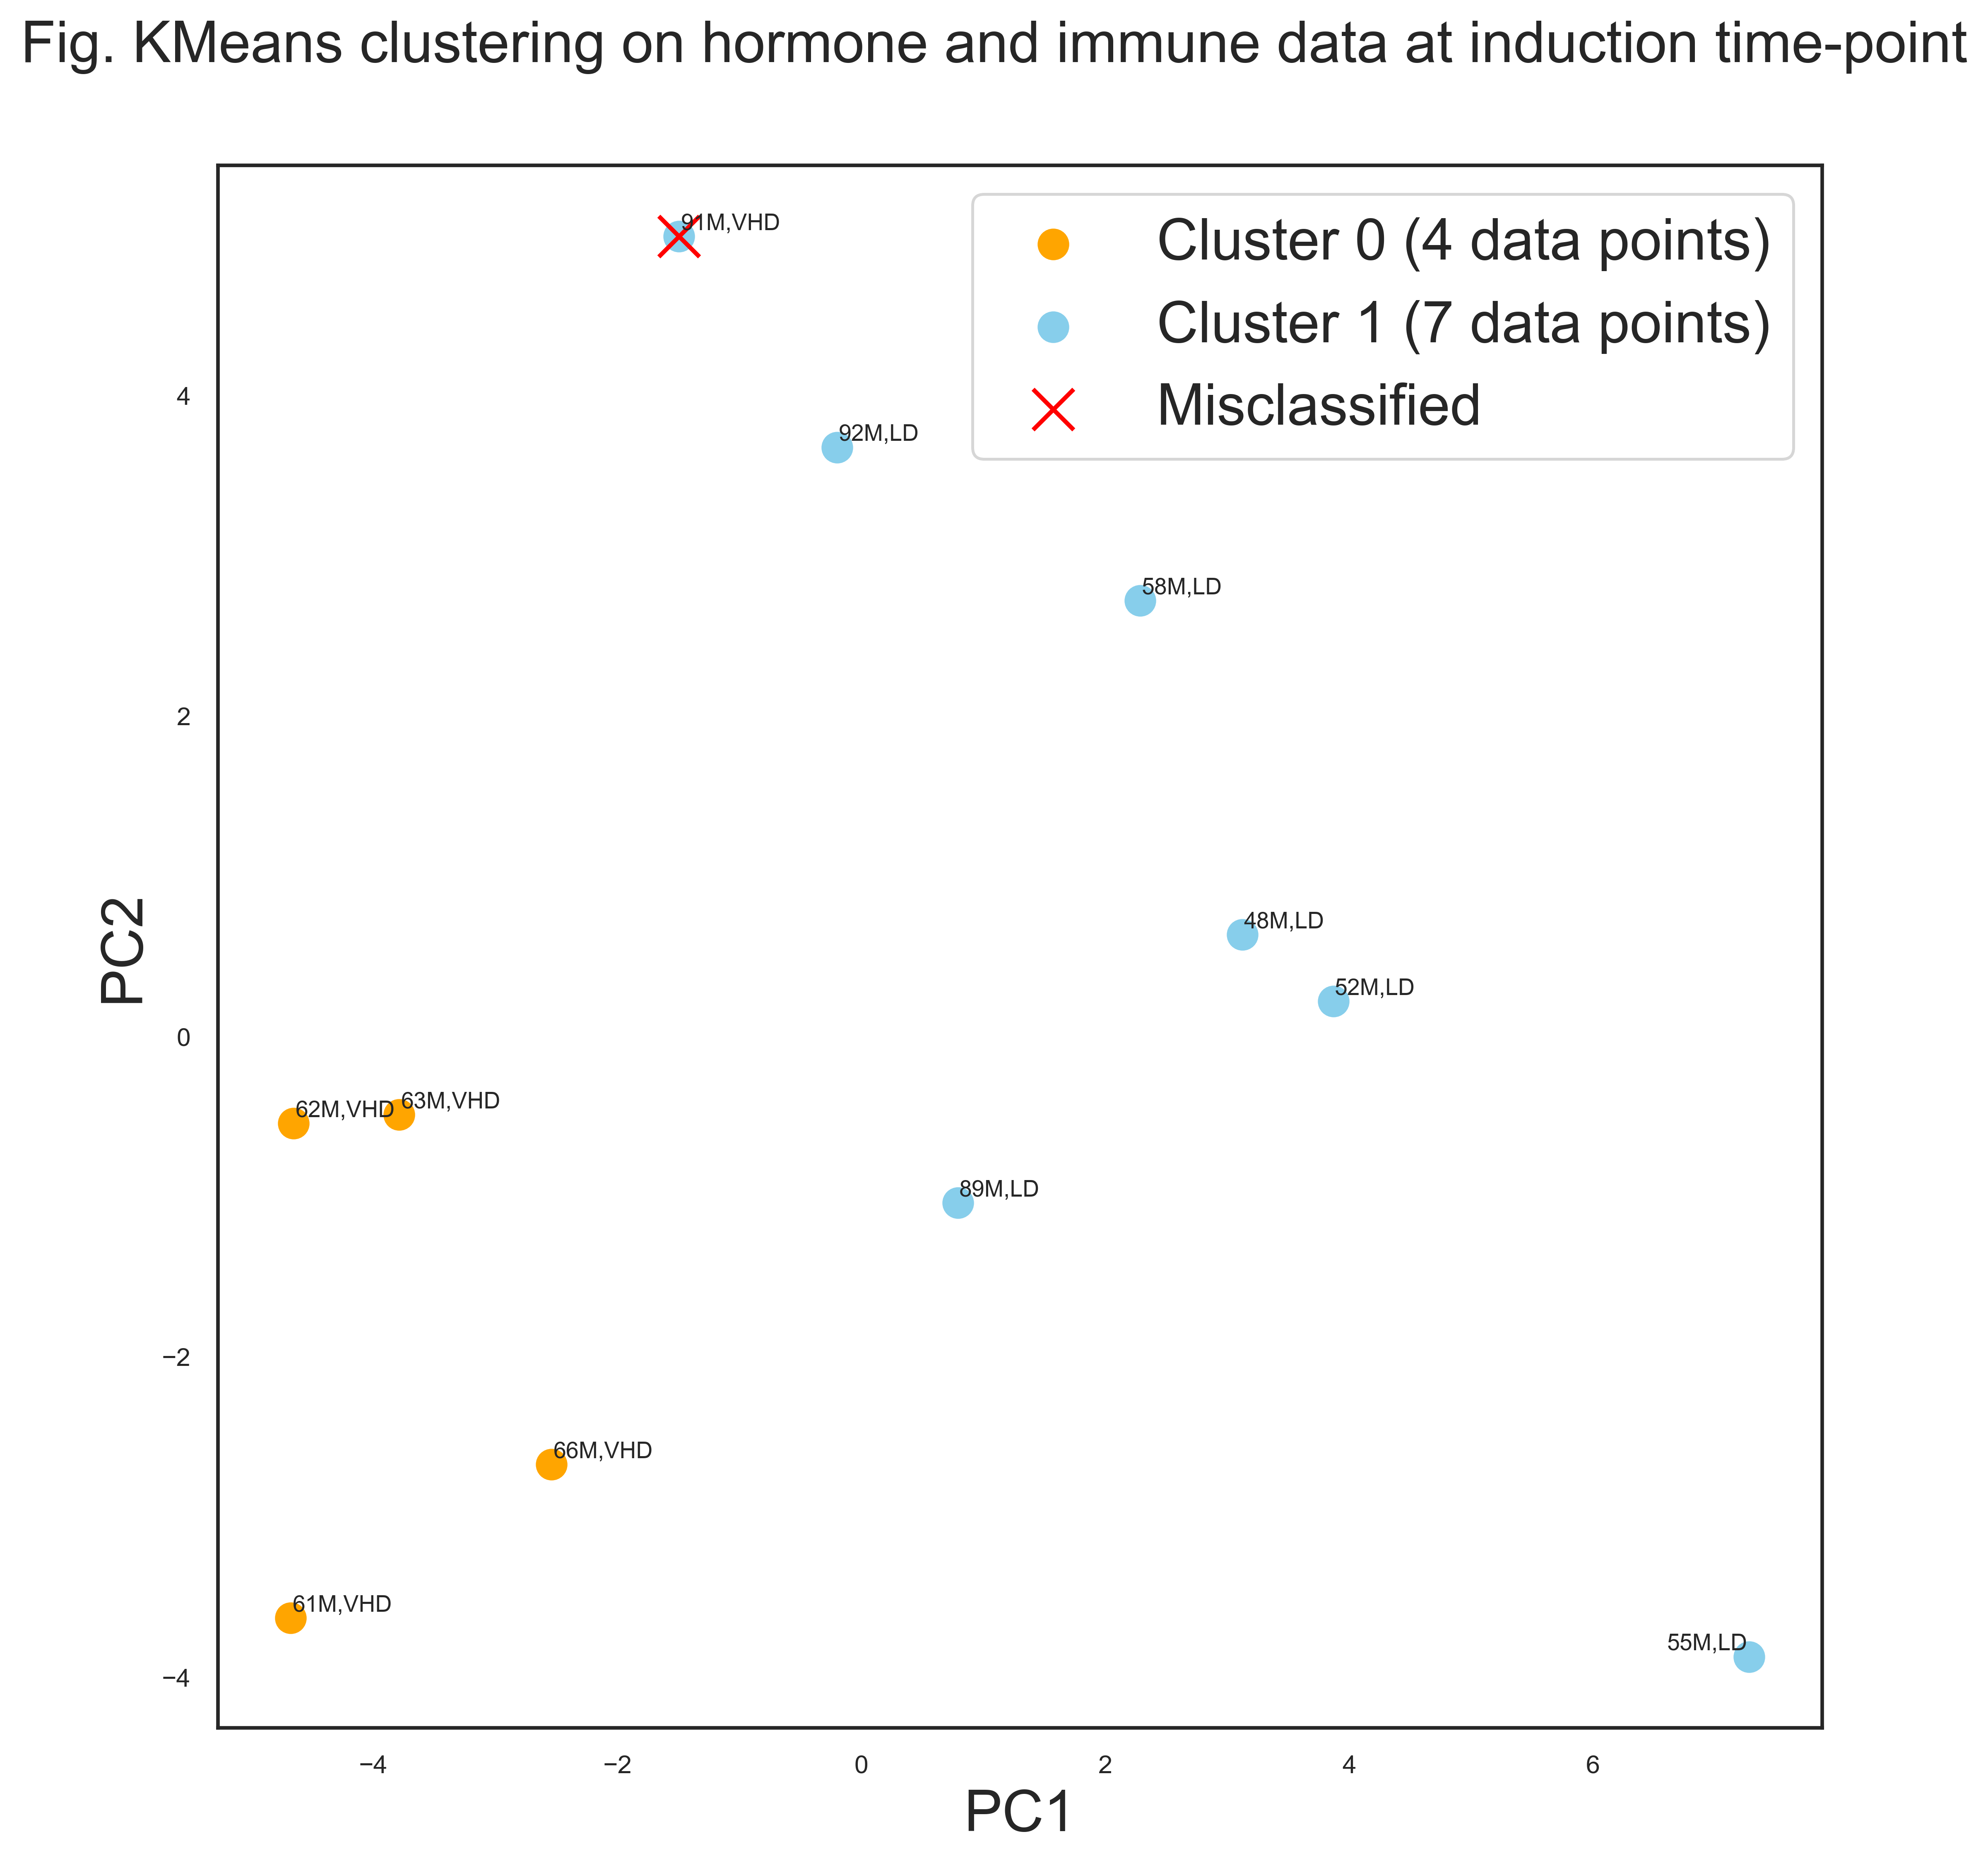

<Figure size 432x288 with 0 Axes>

In [5]:
cols = ['Cortisol', 'ACTH', 'Testosterone', 'Deoxycorticosterone', 'Aldosterone', 'DHEAS', 'Osteocalcin', 'CTX',
       'FGF_basic', 'IL_1b', 'G_CSF', 'IL_10', 'IL_6', 'IL_12', 'RANTES', 'Eotaxin', 'IL_17', 'MIP_1a', 
        'MIP_1b', 'MCP_1', 'IL_15', 'EGF', 'IL_5', 'HGF', 'VEGF', 'IFN_y', 'MDC', 'I_TAC', 
        'MIFAnalyte_46', 'IL_1RA', 'TNF_a', 'IL_2', 'IP_10', 'MIG','IL_4', 'IL_8']

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from adjustText import adjust_text
from collections import Counter
from sklearn.metrics import confusion_matrix
import numpy as np

df = pd.read_table(data_path)
df = df.filter(columns).dropna().query("DrinkingCategory in ['LD', 'VHD']")
df = df.reset_index(drop=True)
print(df.shape)

# Select the features and target variable
X = df[cols]
y1 = (df['DrinkingCategory'] == 'VHD').astype(int)
y2 = (df['DrinkingCategory'] == 'LD').astype(int)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# normalizer = Normalizer()
# X_std = normalizer.fit_transform(X)

# pca = PCA(2)
# PCA_Dataset = pca.fit_transform(X_std)
# print('Cumulative variance explained by PC: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

# Perform kmeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
predicted_label = kmeans.fit_predict(X_std)
print(predicted_label)

# Add new columns called target_label1 and target_label2
df['target_label1'] = y1
df['target_label2'] = y2

# Calculate the accuracy of kmeans
accuracy1 = accuracy_score(predicted_label, df['target_label1'])
accuracy2 = accuracy_score(predicted_label, df['target_label2'])
accuracy = max(accuracy1, accuracy2)

# Determine the target labels for the confusion matrix based on the maximum accuracy
target_labels = df['target_label1'] if accuracy == accuracy1 else df['target_label2']

# Generate the confusion matrix
cm = confusion_matrix(target_labels, predicted_label)
plt.figure(figsize=(5, 5), dpi=500)
# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
plt.title('Confusion Matrix')

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("/Users/nises/Desktop/figures/induction_hi_cm.pdf")

print(f"Accuracy of kmeans: {accuracy:.2f}")

# Find misclassified points based on the maximum accuracy
if accuracy == accuracy1:
    misclassified_points = np.where(predicted_label != df['target_label1'])[0]
else:
    misclassified_points = np.where(predicted_label != df['target_label2'])[0]

# Print out the feature importances based on the KMeans model
# print(f"Feature Importances: {kmeans.cluster_centers_.sum(axis=0)}")

# Print out the feature importances based on the KMeans model, along with the feature names
# feature_importances = list(zip(cols, kmeans.cluster_centers_.sum(axis=0)))
# print(f"Feature Importances:")
# for feature, importance in feature_importances:
#     print(f"{feature}: {importance:.2f}")

# Perform PCA to project the data onto a 2D space
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Set colors for the data points
colors = ['orange' if label == 0 else 'blue' for label in predicted_label]

# Plot the data points with different colors for each cluster and add annotations for modified ID and Sex
fig, ax = plt.subplots(figsize=(10, 10), dpi=500)
# Create separate scatter plots for each cluster label
for label, color in zip(set(predicted_label), ['orange', 'skyblue']):
    mask = predicted_label == label
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], c=color, s=100, label='Cluster {} ({} data points)'.format(label, np.sum(mask)))

# Add cross marks for misclassified points
ax.scatter(X_pca[misclassified_points, 0], X_pca[misclassified_points, 1], marker='x', color='red', s=200, label='Misclassified')
    
annotations = []
for i, txt in enumerate(df['ID']):
    mod_id = str(txt)[-2:] + df['Sex'][i]
    annotations.append(ax.annotate(mod_id + ',' + df['DrinkingCategory'][i], (X_pca[i, 0], X_pca[i, 1]), fontsize=8, arrowprops=None))

adjust_text(annotations)

plt.legend(fontsize=20, loc='upper right')
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)

# Add figure title
plt.suptitle('Fig. KMeans clustering on hormone and immune data at induction time-point', fontsize=20, y=0.95)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("/Users/nises/Desktop/figures/induction_hi_kmeans.pdf")
